<a href="https://colab.research.google.com/github/junghc801/AstroData/blob/main/Week8_Calculate_Hubble_Constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
import astropy.io.ascii
import astropy.units as u
import astropy.constants as const

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003 (1).vot


In [22]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

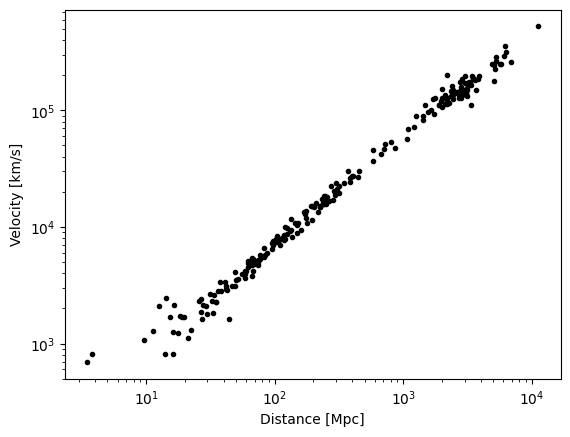

In [23]:
# Plot data in linear scale
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

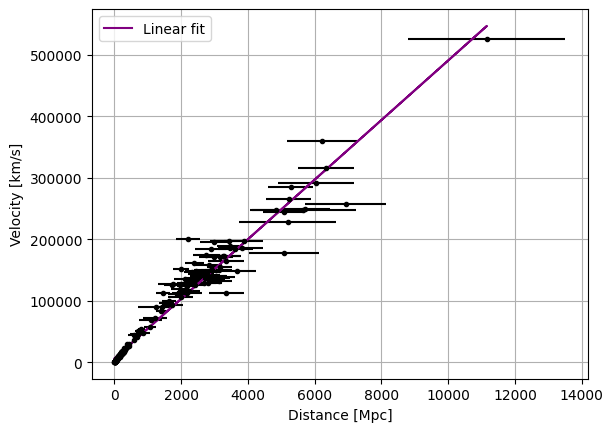

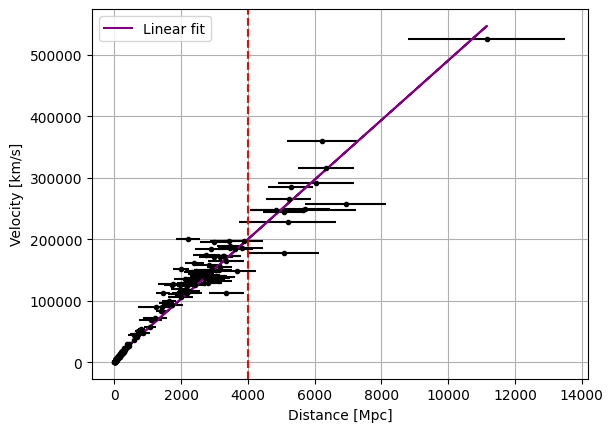


Slope: 48.46597819664574
Intercept: 6324.939132210128
The Hubble Constant is 48.47


In [24]:
distance = 10**dat["col8"] / 72.0 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc

# Linear fit
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 12000))
z_linear = np.polyfit(distance.to(u.mpc).value[ind], velocity.to(u.km / u.s).value[ind], 1)

# y = ax + b
c_linear = z_linear[0] * x + z_linear[1]

# Total
plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(distance.to(u.mpc).value, c_linear, color = "purple", label = "Linear fit")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.grid()
plt.show()

print()

plt.errorbar(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.axvline(x=4000, color="red", linestyle="--")
plt.plot(distance.to(u.mpc).value, c_linear, color = "purple", label = "Linear fit")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.grid()
plt.show()
print()
print("Slope: " + str(z_linear[0]))
print("Intercept: " + str(z_linear[1]))
print("The Hubble Constant is " + str(round(z_linear[0], 2)))

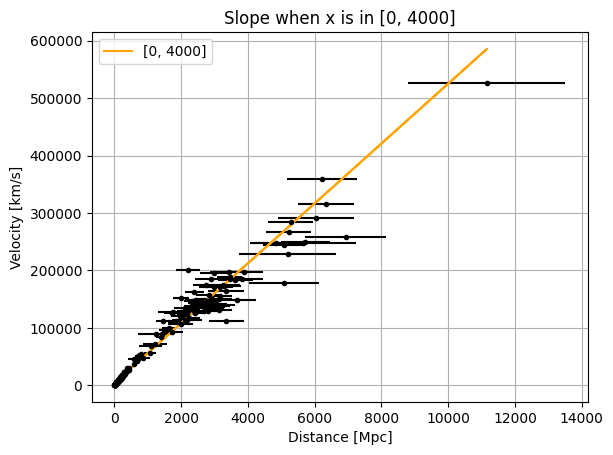


Slope: 52.1195648435643
Intercept: 3900.4927100465766
The Hubble Constant is 52.12


In [25]:
# Distance = [0, 4000]
x = distance.to(u.mpc).value
ind1 = np.where((x > 0) & (x <= 4000))
z_linear1 = np.polyfit(distance.to(u.mpc).value[ind1], velocity.to(u.km / u.s).value[ind1], 1)
c_linear1 = z_linear1[0] * x + z_linear1[1]
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc

plt.errorbar(x, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(x, c_linear1, color = "orange", label = "[0, 4000]")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.title("Slope when x is in [0, 4000]")
plt.legend()
plt.grid()
plt.show()
print()
print("Slope: " + str(z_linear1[0]))
print("Intercept: " + str(z_linear1[1]))
print("The Hubble Constant is " + str(round(z_linear1[0], 2)))

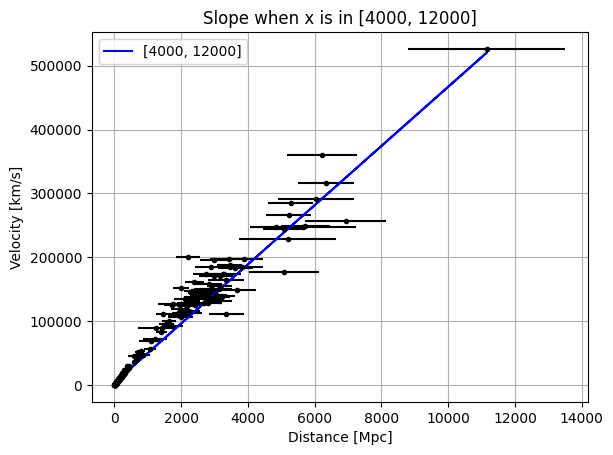

Slope: 46.270247767435926
Intercept: 4072.0177659996366

The Hubble Constant is 46.27


In [30]:
# Distance = [4000, 12000]
x = distance.to(u.mpc).value
ind2 = np.where((x > 4000) & (x < 12000))
z_linear2 = np.polyfit(distance.to(u.mpc).value[ind2], velocity.to(u.km / u.s).value[ind2], 1)
c_linear2 = z_linear2[0] * x + z_linear2[1]
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc

plt.errorbar(x, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(x, c_linear2, color = "blue", label = "[4000, 12000]")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.title("Slope when x is in [4000, 12000]")
plt.legend()
plt.grid()
plt.show()
print("Slope: " + str(z_linear2[0]))
print("Intercept: " + str(z_linear2[1]))
print()
print("The Hubble Constant is " + str(round(z_linear2[0], 2)))

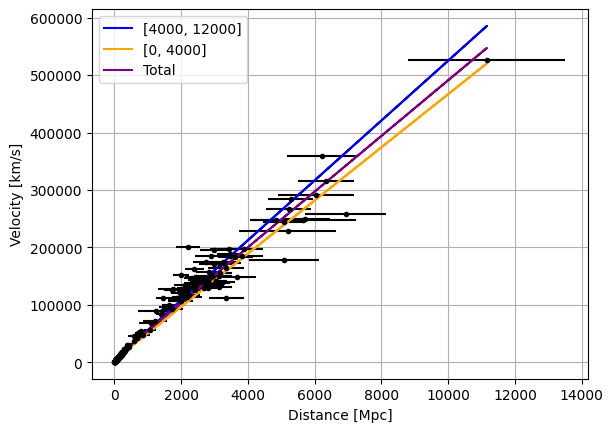

In [31]:
plt.errorbar(x, velocity.to(u.km / u.s).value, xerr=distance_error.to(u.mpc).value, marker=".", color="black", linestyle="none")
plt.plot(x, c_linear1, color = "blue", label = "[4000, 12000]")
plt.plot(x, c_linear2, color = "orange", label = "[0, 4000]")
plt.plot(distance.to(u.mpc).value, c_linear, color = "purple", label = "Total")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Total
hubble_constant = z_linear[0] * u.km / u.s / u.Mpc
ageUniverse = (1 / hubble_constant).to(u.Gyr)
print("The Age of Universe is " + str(ageUniverse))
# [0, 4000]
hubble_constant1 = z_linear1[0] * u.km / u.s / u.Mpc
ageUniverse1 = (1 / hubble_constant1).to(u.Gyr)
print("The Age of Universe is " + str(ageUniverse1))
# [4000, 12000]
hubble_constant2 = z_linear2[0] * u.km / u.s / u.Mpc
ageUniverse2 = (1 / hubble_constant2).to(u.Gyr)
print("The Age of Universe is " + str(ageUniverse2))

The Age of Universe is 20.174816604618965 Gyr
The Age of Universe is 18.760559966600077 Gyr
The Age of Universe is 21.13220198420765 Gyr
